<a href="https://colab.research.google.com/gist/DDD25091998/79a962d54eaf3a519da9fcdf1e5864c3/cats-and-dogos-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive, files

drive.mount("/content/drive/")




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import tensorflow as tf 
import keras 
from keras.preprocessing.image import ImageDataGenerator
import tflearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import os
from tqdm import tqdm
import pandas as pd

from tflearn.layers import conv_2d, max_pool_2d, local_response_normalization, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


cat_train_dir = "drive/My Drive/Collab For Github/Data/Cats or dog/Train/cats"
dog_train_dir = "drive/My Drive/Collab For Github/Data/Cats or dog/Train/dogs"

cat_test_dir = "drive/My Drive/Collab For Github/Data/Cats or dog/Test/cats"
dog_test_dir = "drive/My Drive/Collab For Github/Data/Cats or dog/Test/dogs"

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


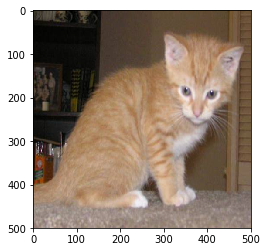

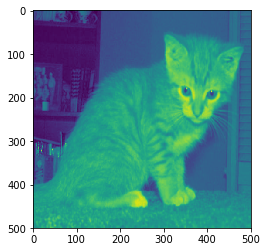

In [0]:
# Lets' print out the 3rd image of the Test cat file to see how images look like
image = img.imread('drive/My Drive/Collab For Github/Data/Cats or dog/Test/cats/cat.4003.jpg')
image = cv2.resize(image, (500,500))
imgplot = plt.imshow(image)
plt.show()

# For this exercise we will be using the Grayscale images
image = cv2.imread('drive/My Drive/Collab For Github/Data/Cats or dog/Test/cats/cat.4003.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (500,500))
imgplot = plt.imshow(image)
plt.show()



In [0]:
# We define a labeler function that gives a one hot encoding of labels : [1,0] for cats and [0,1] for dogs

def labeler(a):
  
  if a.split(".")[-3] =="cat":
    return [1,0]
  elif a.split(".")[-3] =="dog" :
    return [0,1]

# Next, we apply this labeller function that takes the directory as an input and then for each image in the directory runs the labeler function 

def create_dataset(directory,IMG_SIZE, name, save = False):
  dataset = []
  for IMG in tqdm(os.listdir(directory)):
    try : 
      path = os.path.join(directory,IMG)
      image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
      dataset.append([np.array(image),np.array(labeler(IMG))])
    except:
      print("loaded everything except : ", path)
  if save == True:  
    np.save(name,dataset)  
  return dataset


In [0]:
# If you do not have the numpy array of the photographs, comment out the '''. This will create a Test and Train numpy array from the 4 files we have. 

'''

cat_test_list = create_dataset(cat_test_dir,50,"drive/My Drive/Collab For Github/Data/cats_test.npy",save = True)
dog_test_list = create_dataset(dog_test_dir,50,"drive/My Drive/Collab For Github/Data/dogs_test.npy",save = True) 
cat_train_list = create_dataset(cat_train_dir,50,"drive/My Drive/Collab For Github/Data/cats_train.npy",save = True)
dog_train_list = create_dataset(dog_train_dir,50,"drive/My Drive/Collab For Github/Data/dogs_train.npy",save = True)

TRAIN = np.concatenate((cat_train_list,dog_train_list),axis = 0)
np.random.shuffle(TRAIN) # all shuffled cat and dog images for trainning

TEST = np.concatenate((cat_test_list,dog_test_list),axis = 0)
np.random.shuffle(TEST)# all shuffled cat and dog images for trainning

'''



'\n\ncat_test_list = create_dataset(cat_test_dir,50,"drive/My Drive/Collab For Github/Data/cats_test.npy",save = True)\ndog_test_list = create_dataset(dog_test_dir,50,"drive/My Drive/Collab For Github/Data/dogs_test.npy",save = True) \ncat_train_list = create_dataset(cat_train_dir,50,"drive/My Drive/Collab For Github/Data/cats_train.npy",save = True)\ndog_train_list = create_dataset(dog_train_dir,50,"drive/My Drive/Collab For Github/Data/dogs_train.npy",save = True)\n\nTRAIN = np.concatenate((cat_train_list,dog_train_list),axis = 0)\nnp.random.shuffle(TRAIN) # all shuffled cat and dog images for trainning\n\nTEST = np.concatenate((cat_test_list,dog_test_list),axis = 0)\nnp.random.shuffle(TEST)# all shuffled cat and dog images for trainning\n\n'

In [0]:
#If we do not have a file remove the # so that only the previous block is run

#'''
a = np.load("drive/My Drive/Collab For Github/Data/cats_train.npy",allow_pickle=True)
b = np.load("drive/My Drive/Collab For Github/Data/dogs_train.npy",allow_pickle=True)

c = np.load("drive/My Drive/Collab For Github/Data/cats_test.npy",allow_pickle=True)
d = np.load("drive/My Drive/Collab For Github/Data/dogs_test.npy",allow_pickle=True)


TRAIN = np.concatenate((a,b),axis = 0)
np.random.shuffle(TRAIN) # all shuffled cat and dog images for trainning

TEST = np.concatenate((c,d),axis = 0) # all shuffled cat and dog images for trainning
np.random.shuffle(TEST)


#'''

In [0]:
tf.reset_default_graph()

# creating the model 
LR = 1e-5
#input layer 
conv_NN = input_data(shape = [None,50,50,1], name = "training_data")


#conv layers


conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=32, filter_size=5, strides = 1)
conv_NN = avg_pool_2d(conv_NN, 5)

conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=64, filter_size=5, strides = 1)
conv_NN = avg_pool_2d(conv_NN, 5)

conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=128, filter_size=5, strides = 1)
conv_NN = avg_pool_2d(conv_NN, 5)

conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=128, filter_size=5, strides = 1)
conv_NN = avg_pool_2d(conv_NN, 5)

conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=64, filter_size=5, strides = 1)
conv_NN = max_pool_2d(conv_NN, 5)

conv_NN = conv_2d(conv_NN,activation="relu", nb_filter=32, filter_size=5, strides = 1)
conv_NN = max_pool_2d(conv_NN, 5)


conv_NN = fully_connected(conv_NN,1024,activation="relu")
conv_NN = dropout(conv_NN, keep_prob=0.95)





#output layer
conv_NN = fully_connected(conv_NN,2,activation = "softmax")
conv_NN = regression(conv_NN,optimizer = "adam",learning_rate=LR, name="target")


#define the model 

model = tflearn.DNN(conv_NN)



In [0]:
train = TRAIN[:-1000] # training part used for the trainning phase
val = TRAIN[-1000:] # validation set used for the trainning phase


# We reshape all these arrays to make them useable in the model 
X = np.array([i[0] for i in TRAIN]).reshape(-1,50,50,1)
y = [i[1] for i in TRAIN]

X_val = np.array([i[0] for i in val]).reshape(-1,50,50,1)
y_val = [i[1] for i in val]

X_test = np.array([i[0] for i in TEST]).reshape(-1,50,50,1)
y_test = [i[1] for i in TEST]

#We define a function to show the error rate : 

def error_rate(test_file):
  error = 0
  for num,data in enumerate(test_file):
    image_label = data[1]
    image_data = data[0]
    image_data = image_data.reshape(-1,50,50,1)
    output = model.predict(image_data)[0]
    if np.argmax(output) == 1:
      pred_l = "Dog"
    else : 
      pred_l = "Cat"
    if image_label[1] == 1:
      correct_label = "Dog"
    else :
      correct_label = "Cat"
    if pred_l != correct_label :
      error +=1
  print(error/len(TEST))

In [0]:
model.fit(X,y,show_metric=True, validation_set=(X_val,y_val), n_epoch = 30)
error_rate(TEST)

Training Step: 12947  | total loss: 0.55592 | time: 1.081s
| Adam | epoch: 103 | loss: 0.55592 - acc: 0.7053 -- iter: 6080/8028


In [0]:
# This is the code to save the model for later use
'''
model.save("drive/My Drive/Collab For Github")
if os.path.exists("{}.meta".format(conv_NN)):
  model.load(conv_NN)
  print("model_loaded")


'''



'\nmodel.save("drive/My Drive/Collab For Github")\nif os.path.exists("{}.meta".format(conv_NN)):\n  model.load(conv_NN)\n  print("model_loaded")\n\n\n'